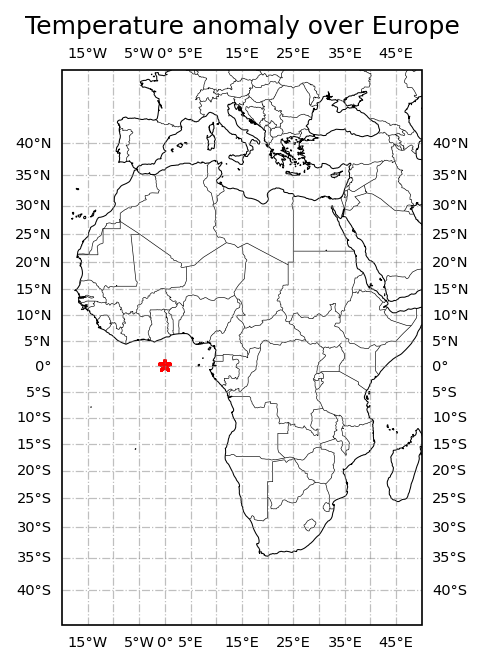

In [25]:
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# First we specify Coordinate Refference System for Map Projection
# We will use Mercator, which is a cylindrical, conformal projection. 
# It has bery large distortion at high latitudes, cannot 
# fully reach the polar regions.
projection = ccrs.Mercator()

# Specify CRS, that will be used to tell the code, where should our data be plotted
crs = ccrs.PlateCarree()

# Now we will create axes object having specific projection 
plt.figure(dpi=150)
ax = plt.axes(projection=projection, frameon=True)

# Draw gridlines in degrees over Mercator map
gl = ax.gridlines(crs=crs, draw_labels=True,
                  linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
gl.xlabel_style = {"size" : 7}
gl.ylabel_style = {"size" : 7}
gl.xlocator = mticker.FixedLocator(np.arange(-20,50,5))
gl.ylocator = mticker.FixedLocator(np.arange(-45,45,5))

# To plot borders and coastlines, we can use cartopy feature
import cartopy.feature as cf
ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

# Now, we will specify extent of our map in minimum/maximum longitude/latitude
# Note that these values are specified in degrees of longitude and degrees of latitude
# However, we can specify them in any crs that we want, but we need to provide appropriate
# crs argument in ax.set_extent
lon_min = -20
lon_max = 50
lat_min = -45
lat_max = 50

# crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
plt.title(f"Temperature anomaly over Europe")
plt.plot(np.arange(-20,50,1),np.arange(-20,50,1), marker='*', color='red')
plt.show()
